> The Black-Scholes formula for a call option 

\begin{equation}
\begin{split}
C(S,K,r,\sigma,T) &= S_0 \Phi(d_1) - K e^{-rT} \Phi(d_2)\\
            d_1 &= \frac{\log \frac{S_0}{K} +
            \left(r+\frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}, \hspace{2cm} d_2 = d_1 - \sigma\sqrt{T}\\
\end{split}            
\end{equation}


 > **S×norm.cdf(d1)**</br>
 > 현재 주식 가격에 이 주식이 미래에 가치가 있을 확률을 곱한 것. </br>
 > "현재 주식을 살 수 있는 권리가 얼마나 가치가 있는지"를 나타내는 것이며, 이는 주식이 미래에 행사 가격보다 더 높게 거래될 확률을 반영.

 > **Ke^−rT * norm.cdf(d2)** </br>
 > 옵션이 만기일에 이익을 낼 확률을 고려한 행사 가격의 현재 가치를 나타냄. </br>
 > 옵션을 실행(사용)하기로 결정했을 때, 실제로 지불해야 할 돈의 현재 가치와 그 확률을 고려함. </br>
 > 행사 가격을 현재 가치로 할인하고, 옵션이 만기일에 수익을 낼 확률을 고려한 값.

> norm.cdf(d1) = 주식 가격이 미래에 옵션의 행사 가격보다 높을 확률

> norm.cdf(d2) = 옵션이 만기일에 이익이 될  확률



In [5]:
import pandas
import numpy as np
from scipy.stats import norm
from scipy.optimize import brentq
import matplotlib.pylab as plt

def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

> The Black-Scholes formula for a put option 

\begin{equation}
P(S,K,r,\sigma,T) = K e^{-rT} \Phi(-d_2) - S_0 \Phi(-d_1)
\end{equation}

In [6]:
def BlackScholesPut(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)


> put-call parity

\begin{equation}
C(S, K, r, \sigma, T) - P(S, K, r, \sigma, T) = S - Ke^{-rT},
\end{equation}

> call and put option should be worth the same amount when $K=Se^{rT}$.

In [7]:
S = 100.0
r = 0.05
T = 2.0
K = S * np.exp(r*T)
sigma = 0.4

In [8]:
print('Call price: %.4f' % BlackScholesCall(S, K, r, sigma, T))
print('Put price: %.4f' % BlackScholesPut(S, K, r, sigma, T))

Call price: 22.2703
Put price: 22.2703


In [13]:
def impliedCallVolatility(S, K, r, price, T):
    try:
        impliedVol = brentq(lambda x: price -
                            BlackScholesCall(S, K, r, x, T),
                            1e-6, 1)
    except Exception:
        impliedVol = np.nan

    return impliedVol


# def impliedVolatility(S, K, r, price, T, payoff):
#     try:
#         if (payoff.lower() == 'call'):
#             impliedVol = brentq(lambda x: price -
#                                 BlackScholesLognormalCall(S, K, r, x, T),
#                                 1e-12, 10.0)
#         elif (payoff.lower() == 'put'):
#             impliedVol = brentq(lambda x: price -
#                                 BlackScholesLognormalPut(S, K, r, x, T),
#                                 1e-12, 10.0)
#         else:
#             raise NameError('Payoff type not recognized')
#     except Exception:
#         impliedVol = np.nan

#     return impliedVol

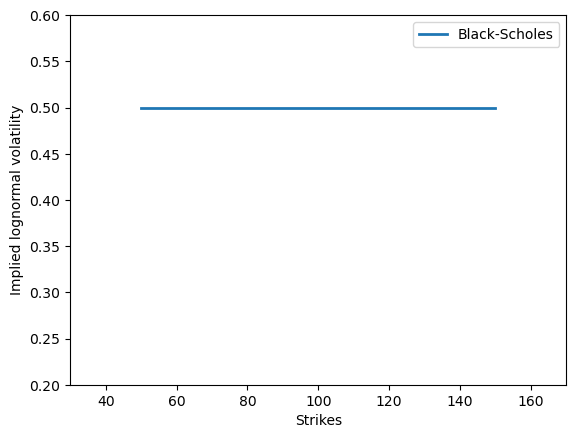

In [14]:
S = 50
r = 0.01
T = 10.0
sigma = 0.5
F = S*np.exp(r*T)
strikes = np.linspace(50, 150, 100)

summary = []
for K in strikes:
    price = BlackScholesCall(S, K, r, sigma, T)
    # price = BachelierCall(S, K, r, sigma_N, T)
    impliedvol = impliedCallVolatility(S, K, r, price, T)
    summary.append([K, impliedvol])

df = pandas.DataFrame(summary, columns=['strike', 'vol'])
df.set_index('strike', drop=True, inplace=True)
plt.plot(df['vol'], linewidth=2.0, label='Black-Scholes')
plt.axis([30, 170, 0.2, 0.6])
plt.legend()
plt.xlabel('Strikes')
plt.ylabel('Implied lognormal volatility')
plt.show()


Clearly, we get a flat surface, because we use the same lognormal volatility to price the options across all strikes. In other words, if the Black-Scholes' assumption that the stock price follows lognormal distribution with a constant variance, then we should expect the implied volatilities to be the same across all strikes.